<a href="https://colab.research.google.com/github/dis-is-pj/Mobile-Price-range-Prediction/blob/main/Prashant_Jha_Mobile_Price_Range_Classification_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

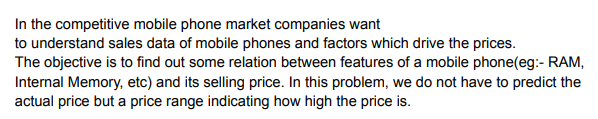

Data Fields:

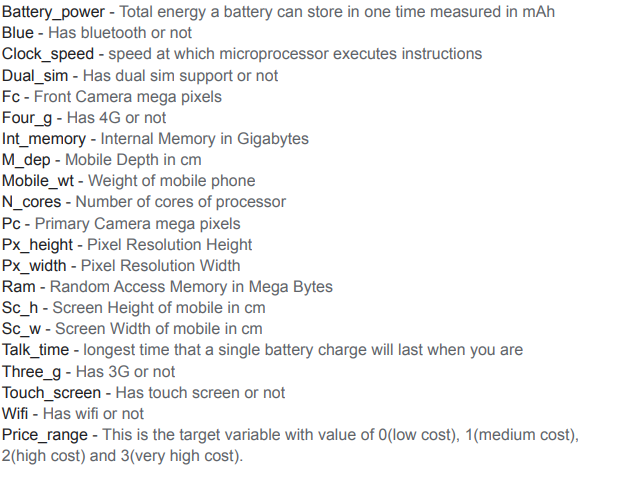

# Data Exploration


Some distribution tables are created in excel and snapshots are attached here.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# loading the Dataset
path = '/content/drive/MyDrive/Cohort Nilgiri/Module 4/Capstone Project 3/data.csv'

df = pd.read_csv(path)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
columns = df.columns

columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Converting columns 'sc_h' and 'sc_w' in a single column screen_size , it will be the vertical length of the mobile.

In [5]:
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

In [7]:
# categorical and continuous separation

categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time','screen_size']

Let's analyze the features value distribution for each target class.

## Categorical analysis

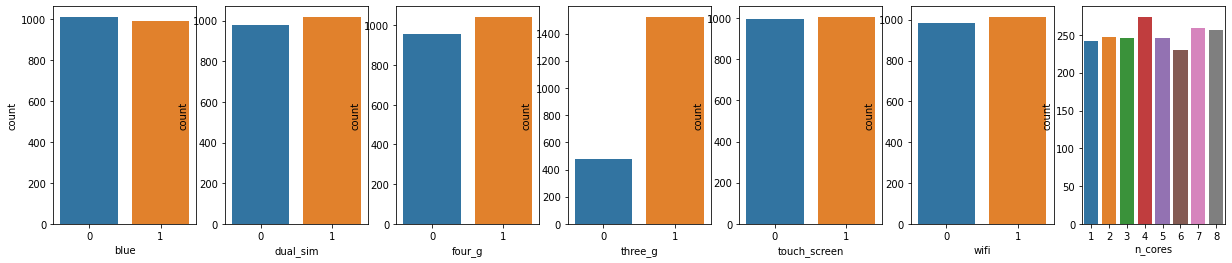

In [8]:
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])


As we can see in the plot above, except 'three_g' and 'n_cores' feature, almost all of them have equal distribution of both categories, three_g can play an important role in prediction.

In [9]:
# function to plot the distribution of categorical feature
# for each price range category
def plot_along_taget(column_name):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    for i in range(4):
        sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
        axs[i].set_xlabel(f'{column_name} category')
        axs[i].set_title(f'for price_range = {i}')

Now let us see the categorical variables distribution along the different categories of target variable 'price_range'

### Bluetooth

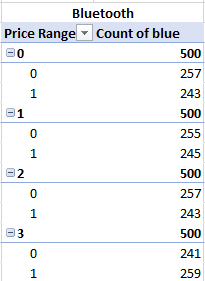

The availability of bluetooth is almost same for every price range as you can see in the above table,let's validate it with the graph.

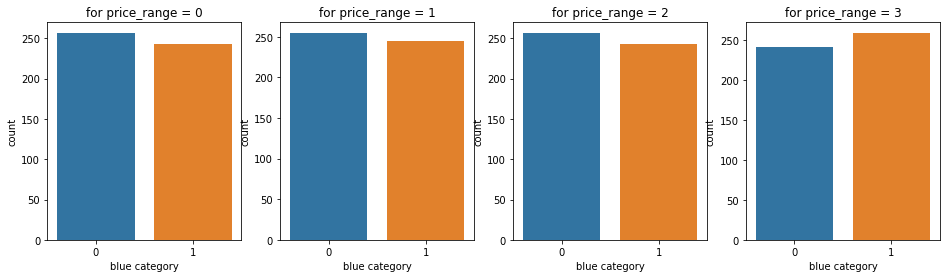

In [10]:
plot_along_taget('blue')

The bluetooth distribution doesn't really varies much from one price_range to another. They all have almost half observations with bluetooth.

### Dual Sim

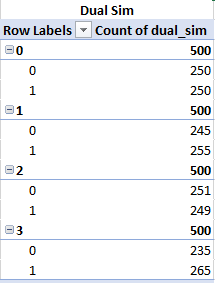

The dual_sim feature is present in half of the observations in each cateory as we can see above table. Let's validate it by graph.

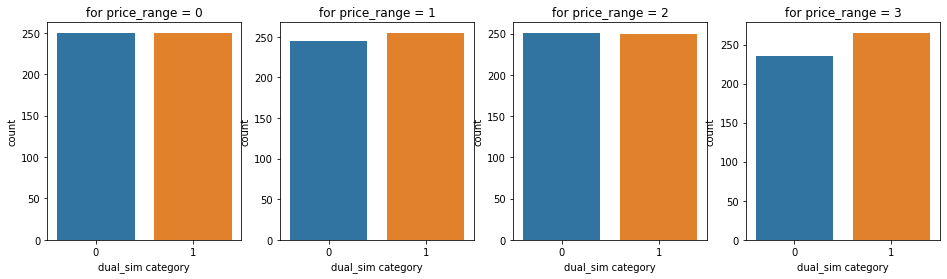

In [11]:
plot_along_taget('dual_sim')

The dual_sim feature distributions shows a little pattern for only price_category 3. For rest of them it has half half distribution.

### 4G

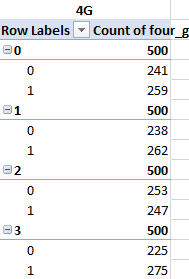

The availability of 4G sim feature also shows similar distribution for each class except price_range 3.

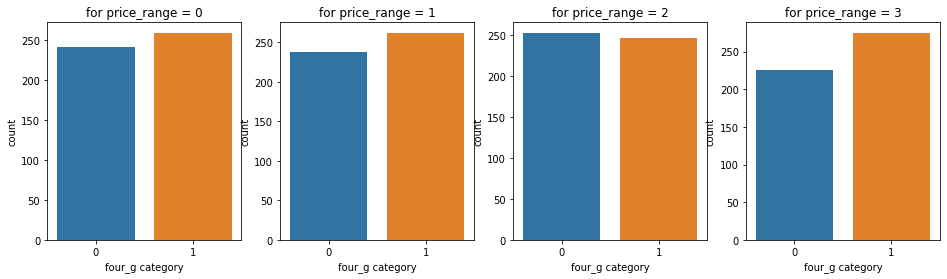

In [12]:
plot_along_taget('four_g')

The graph also shows the same thing. For price range 3 we have more observations with 4G availability.

### 3G

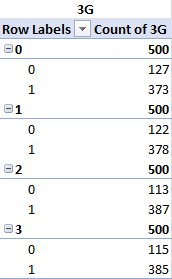

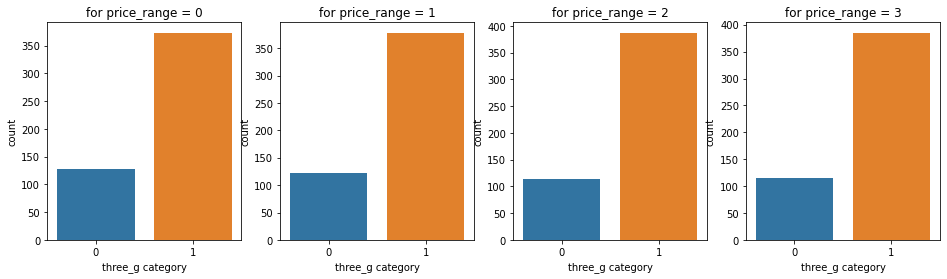

In [13]:
plot_along_taget('three_g')

The availability of 3G shows quite similar distribution for each price range, which doesn't look good for predictions.

### 4G and 3G feature analysis

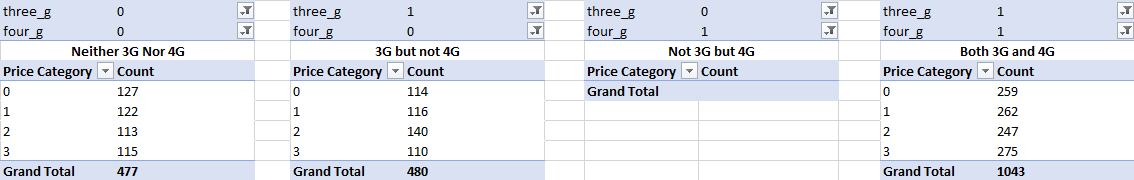

In the above tables, we can look at the combination of feature 3G and 4G. Interestingly, we can observe(look at the third table from left) that there are zero number of mobile phones that supports 4G but not 3G. That means every phone that supports 4G, will support 3G by default.

So, I'm gonna make a single feature called 'network' out of 3G and 4G features.

In [14]:
df['network'] = df['four_g'] + df['three_g']

In this new feature 'network', there will be three categories:


*   0 : Supports neither of 3G or 4G
*   1 : Supports 3G but not 4G
*   2 : Supports both 3G and 4G



In [15]:
# drop the 3G and 4G columns
df.drop(['four_g', 'three_g'], inplace=True, axis=1)

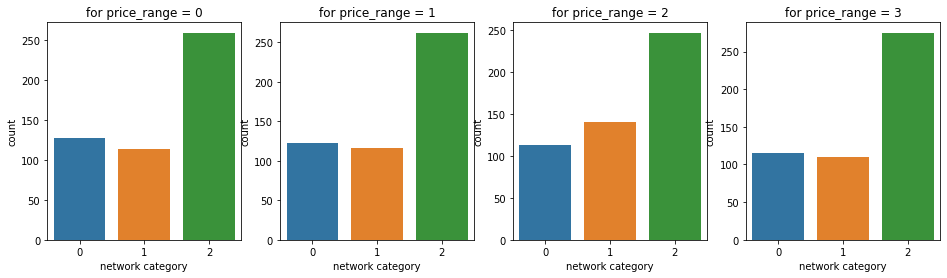

In [16]:
# analyze the distribution of network along target variable
plot_along_taget('network')

The new feature 'network' also does not show much variation along the price ranges. But using it instead of 3G and 4G both will help to reduce the complexity of the problem and makes the models more interpretable.

### Touch Screen

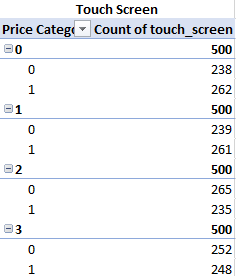

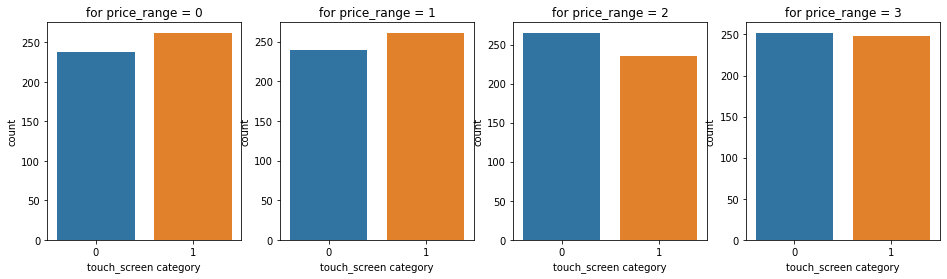

In [17]:
plot_along_taget('touch_screen')

Touch screen feature shows very little variation along the different price categories, which won't help much in price range prediction.

### WiFi

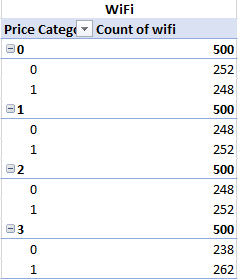

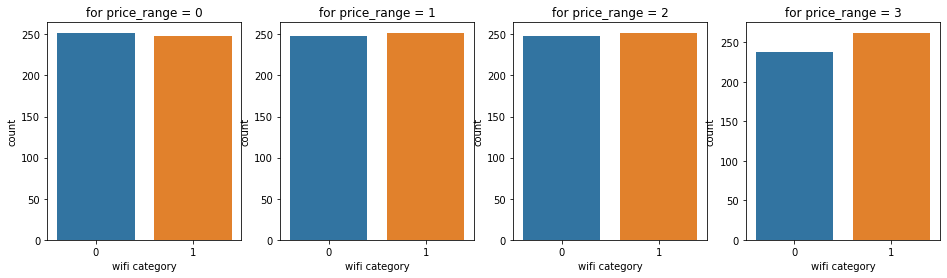

In [18]:
plot_along_taget('wifi')

The wifi feature shows quite similar features except for the price_range 3.

### n_cores

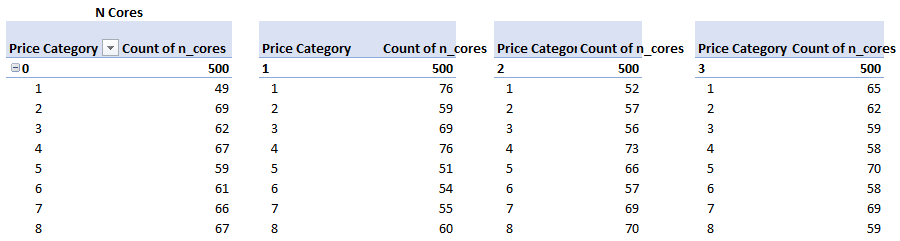

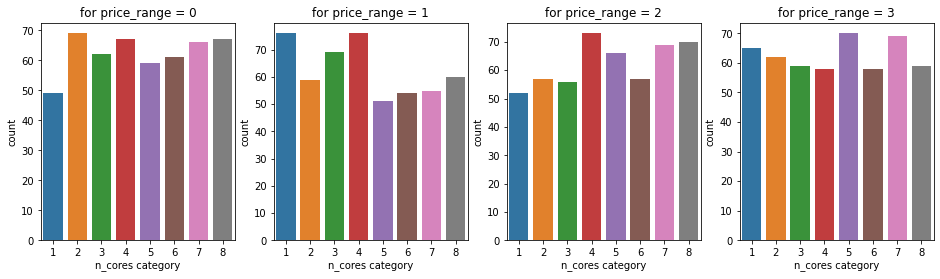

In [19]:
plot_along_taget('n_cores')

number of cores in mobile shows some interesting patterns for different price ranges. It can be a helpful factor for price range prediction.

## Continuous variables analysis

In [20]:
df[continuous].head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,talk_time,screen_size
0,842,2.2,1,7,0.6,188,2,20,756,2549,19,11.401754
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,7,17.262677
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,9,11.180340
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,11,17.888544
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,15,8.246211


Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

In [21]:
df['screen_size'] = df['screen_size']/2.54

Also converting RAM unit from Megabytes to Gigabytes, since we are more usual to Gigabytes.

In [22]:
df['ram'] = df['ram']/1024

In [23]:
sns.set_style('darkgrid')

### Battery Power

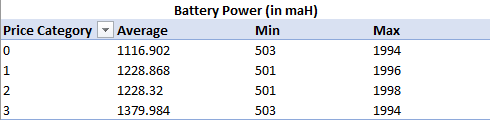

Here we're using density plot, which is a variation of histogram to viualize the distribution of a continuous variable along the categories of target variable.

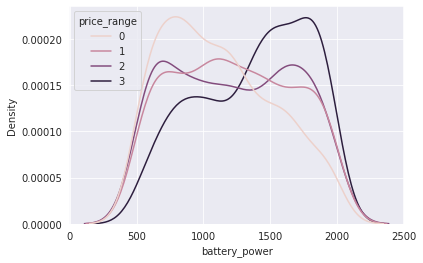

In [33]:
sns.kdeplot(data=df, x='battery_power', hue='price_range',)
plt.show()

Here we can notice clear distribution difference for price_range-0 and price_range-3.


*   Mobiles in price_range-0 mostly have lower battery power.
*   Mobiles in price_range-3 mostly have higher battery power.
*   Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion.

Based on these observations, we can conclude that this feature would be importand for predicting price_range.



### Clock Speed

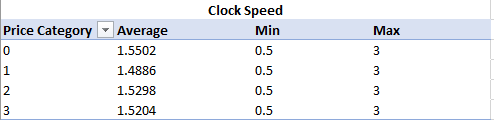

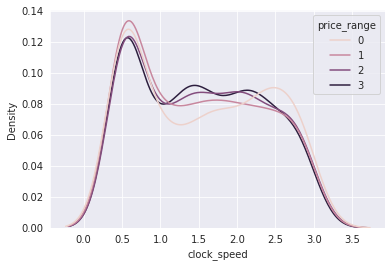

In [34]:
sns.kdeplot(data=df, x='clock_speed', hue='price_range',)
plt.show()

The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different.

### FC (front camera megapixels)

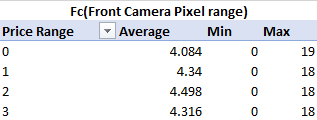

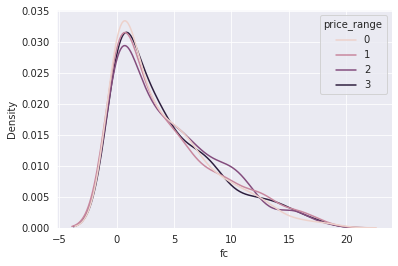

In [35]:
sns.kdeplot(data=df, x='fc', hue='price_range',)
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

### Internal Memory

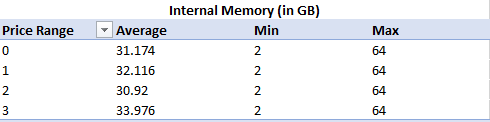

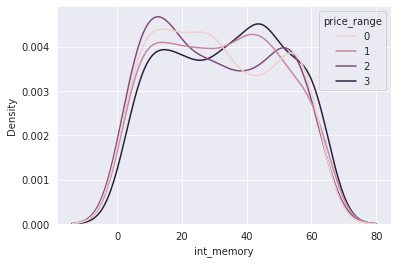

In [37]:
sns.kdeplot(data=df, x='int_memory', hue='price_range',)
plt.show()

There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory. This feature could be helpful in predicting the Price range.

### Mobile Depth

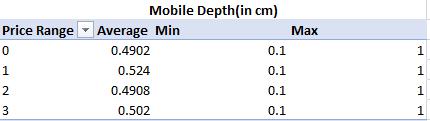

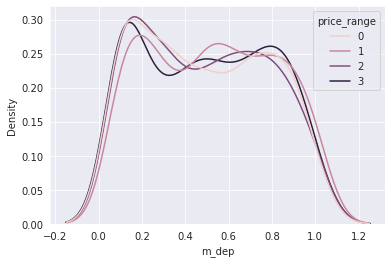

In [38]:
sns.kdeplot(data=df, x='m_dep', hue='price_range',)
plt.show()

Mobile depth again has somewhat similar kind of distribution along all the price_ranges. It's not gonna be a driving factor for deciding price.

### Mobile Weight

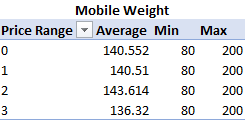

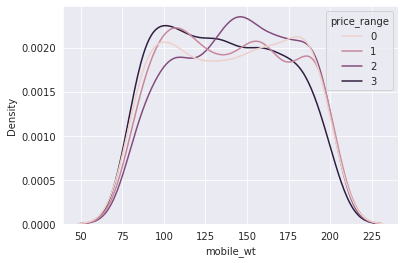

In [39]:
sns.kdeplot(data=df, x='mobile_wt', hue='price_range',)
plt.show()

Mobile weight is reduced a little bit in the Price category-3 which means costly phones are ligher. A little variation is observed here in all price_ranges.

### PC (Primary camera Megapixels)

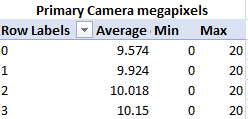

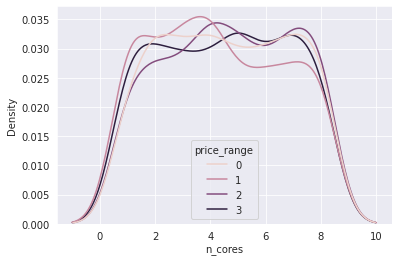

In [40]:
sns.kdeplot(data=df, x='n_cores', hue='price_range',)
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

### Screen Size (Vertical length in pixels)

This is a feature that was not given in the dataset and was generated manually with the help of two features screen_height and screen_width. Instead of Screen height and width, we can keep this feature in the dataset to handle multicollinearity.

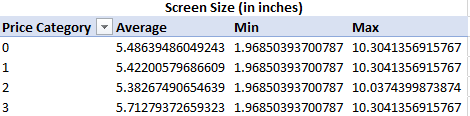

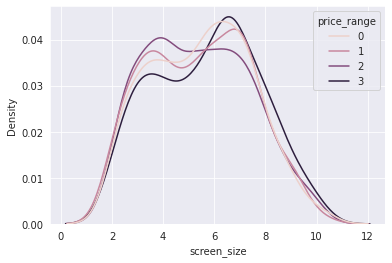

In [42]:
sns.kdeplot(data=df, x='screen_size', hue='price_range',)
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

### px_height (Pixel Resolution Height)

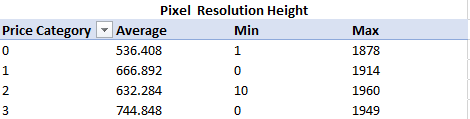

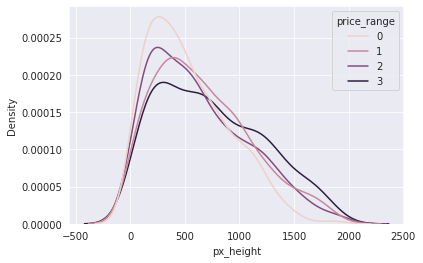

In [43]:
sns.kdeplot(data=df, x='px_height', hue='price_range',)
plt.show()

A little variation is there in px_height.

### px_width (Pixel resolution width)

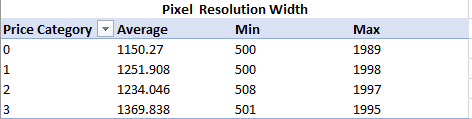

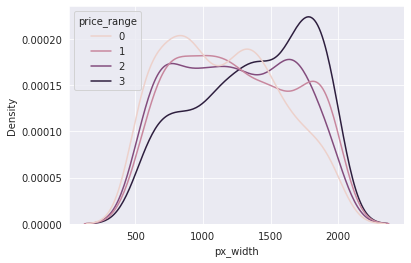

In [44]:
sns.kdeplot(data=df, x='px_width', hue='price_range',)
plt.show()

Some variation is visible here in px_width as well, so we can say that it would be a driving factor in deciding price_range.

### RAM (in GB)

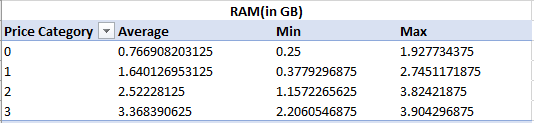

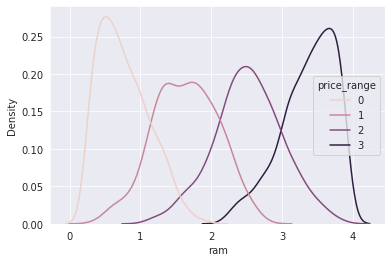

In [41]:
sns.kdeplot(data=df, x='ram', hue='price_range',)
plt.show()

RAM is showing a great variation in the distribution along the target variable. Which is a good sign for making predictions. RAM is gonna be a driving factor for predicting price_range.

### Talk Time (in Hours)

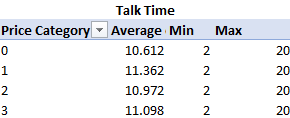

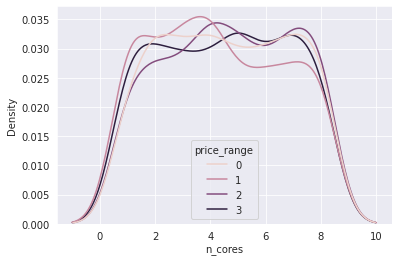

In [45]:
sns.kdeplot(data=df, x='n_cores', hue='price_range',)
plt.show()

A little variation is visible in talk time along the price_ranges.

### Checking colinearity in continuous variables

In [24]:
corr = df[continuous].corr()

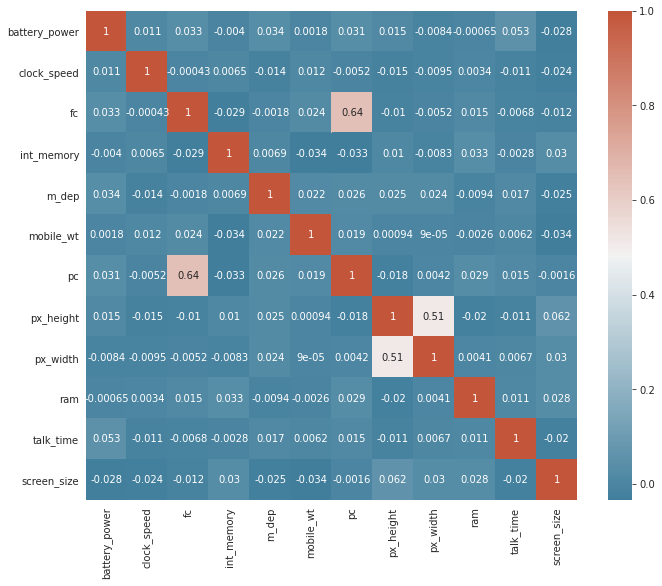

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

There is some colinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.

In [26]:
# make single feature out of px_height and px_width.
df['pixels'] = df['px_height']*df['px_width']

In [27]:
continuous.append('pixels')

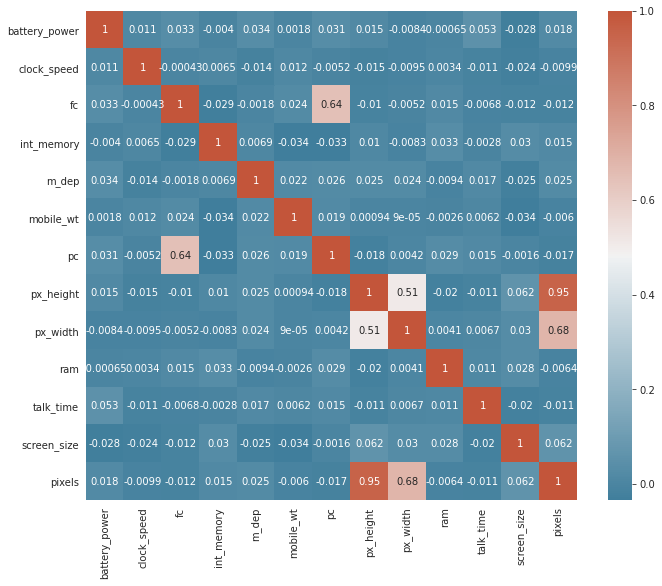

In [28]:
# let's check the colinearity again
corr = df[continuous].corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

We can drop the px_height and px_width column now.

In [29]:
df.drop(['px_height', 'px_width'], axis=1, inplace=True)

# Predictive Modelling

In [30]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
# have a look at the features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'screen_size', 'network',
       'pixels'],
      dtype='object')

In [32]:
X = df.drop('price_range', axis=1)
y = df.price_range.values

## Decision Tree

In [33]:
clsr = DecisionTreeClassifier()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [35]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3]), array([139, 154, 140, 167]))

In [36]:
clsr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
y_pred = clsr.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.8516666666666667

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       139
           1       0.86      0.77      0.81       154
           2       0.74      0.84      0.79       140
           3       0.92      0.87      0.90       167

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600



Have a look at the feature importances according to decision tree model

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [104]:
feature_importance.head()

,Feature,Score
0,ram,0.638140
1,pixels,0.148724
2,battery_power,0.118176
3,screen_size,0.015705
4,mobile_wt,0.013282


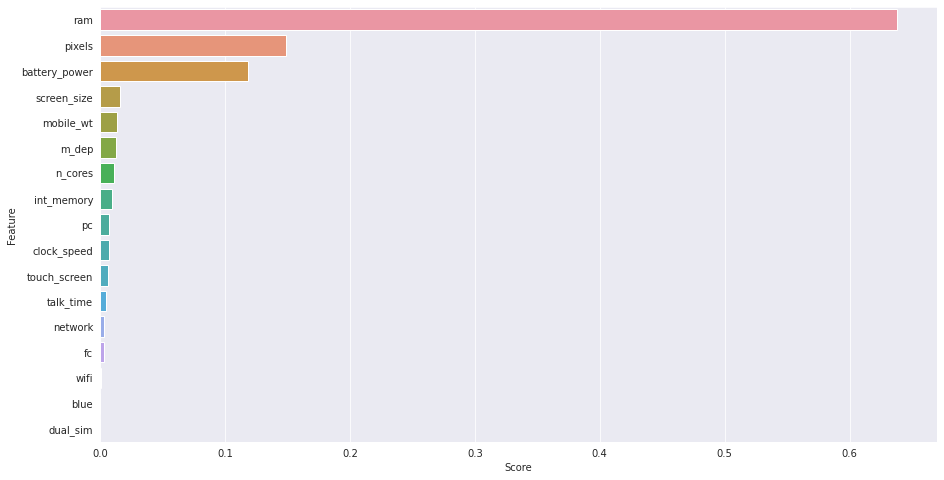

In [103]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

In [105]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

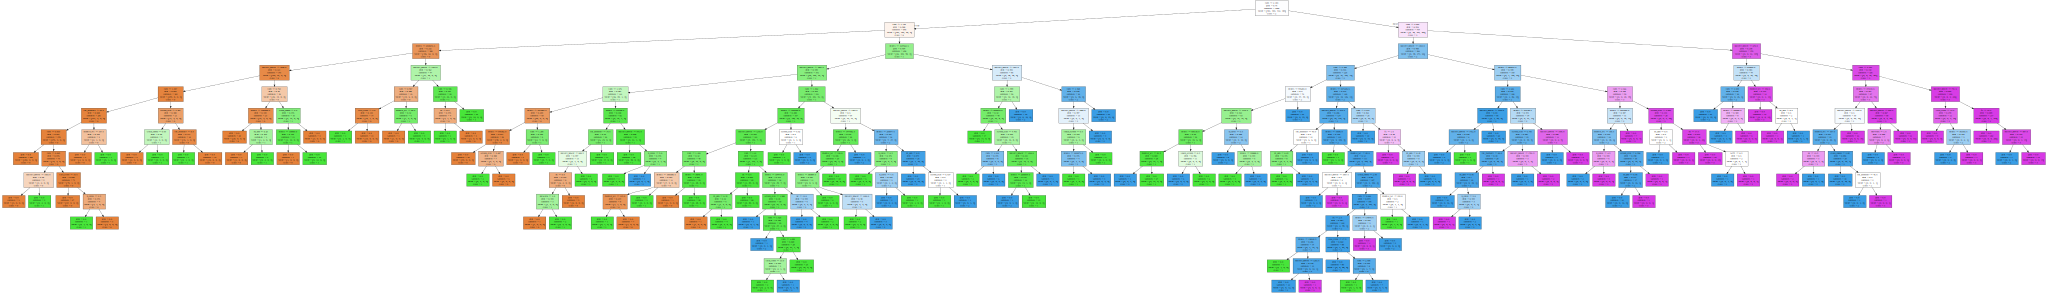

In [106]:
graph = Source(tree.export_graphviz(clsr, out_file=None
   , feature_names=df.drop('price_range', axis=1).columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
clsr = RandomForestClassifier(n_estimators=300)

In [125]:
clsr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
y_pred = clsr.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred)

0.855

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.82      0.81      0.82        97
           2       0.74      0.77      0.76        88
           3       0.92      0.88      0.90       116

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400

